# VVV Machine Analysis Samples size 5k

In [1]:
% matplotlib inline

import time
import pandas as pd

from IPython import display as d

import seaborn as sns
sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from libs import container
from libs.experiment import (
    WithAnotherExperiment, KFoldExperiment, roc, 
    discretize_classes, clean_features)

## 1. Load Data

In [2]:
start = time.time()

path = "/home/data/carpyncho/stored/samples/5k/"
data = container.read(path)

print("Removing b220...")
del data["b220"]

Loading '/home/data/carpyncho/stored/samples/5k/b278_sample_5k.npy'...
Loading '/home/data/carpyncho/stored/samples/5k/b262_sample_5k.npy'...
Loading '/home/data/carpyncho/stored/samples/5k/b261_sample_5k.npy'...
Loading '/home/data/carpyncho/stored/samples/5k/b263_sample_5k.npy'...
Loading '/home/data/carpyncho/stored/samples/5k/b220_sample_5k.npy'...
Loading '/home/data/carpyncho/stored/samples/5k/b264_sample_5k.npy'...
Removing b220...


##  2. Preprocess

### 2.1. Discretize the classes

In [3]:
data, classes, sclasses = discretize_classes(data)
d.display(d.Markdown("**Classes**"))
d.display(classes)

d.display(d.Markdown("----"))
d.display(d.Markdown("**Simplified Classes**"))
d.display(sclasses)

**Classes**

{'': 0,
 'Cep-1': 1,
 'Cep-F': 2,
 'LPV-Mira': 3,
 'LPV-OSARG': 4,
 'LPV-SRV': 5,
 'RRLyr-RRab': 6,
 'RRLyr-RRc': 7,
 'RRLyr-RRd': 8,
 'T2Cep-BLHer': 9,
 'T2Cep-RVTau': 10,
 'T2Cep-WVir': 11}

----

**Simplified Classes**

{'': 0, 'Cep': 1, 'LPV': 2, 'RRLyr': 3, 'T2Cep': 4}

### 2.2. Removes all low-variance and "bad" features

In [4]:
X_columns = clean_features(data, "b278")
print("Total features:", X_columns.size)

('Total features:', 54)


### 2.3. Selected features

In [5]:
X_columns.values

array(['cnt', 'AMP', 'Amplitude', 'AndersonDarling', 'Autocor_length',
       'Beyond1Std', 'CAR_mean', 'CAR_sigma', 'CAR_tau', 'Con', 'Eta_e',
       'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35',
       'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
       'FluxPercentileRatioMid80', 'Freq1_harmonics_amplitude_0',
       'Freq1_harmonics_amplitude_1', 'Freq1_harmonics_amplitude_2',
       'Freq1_harmonics_amplitude_3', 'Freq1_harmonics_rel_phase_1',
       'Freq1_harmonics_rel_phase_2', 'Freq1_harmonics_rel_phase_3',
       'Freq2_harmonics_amplitude_0', 'Freq2_harmonics_amplitude_1',
       'Freq2_harmonics_amplitude_2', 'Freq2_harmonics_amplitude_3',
       'Freq2_harmonics_rel_phase_1', 'Freq2_harmonics_rel_phase_2',
       'Freq2_harmonics_rel_phase_3', 'Freq3_harmonics_amplitude_0',
       'Freq3_harmonics_amplitude_1', 'Freq3_harmonics_amplitude_2',
       'Freq3_harmonics_amplitude_3', 'Freq3_harmonics_rel_phase_1',
       'Freq3_harmonics_rel_phase_2', 'Freq

In [6]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">3. b278 Vs Itself (with 10 kfolds)</h2>
</div>

### 3.1. SVM - Linear

Execute a SVM with a linear kernel. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [7]:
svc_linear = KFoldExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_linear = svc_linear("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      5000
        3.0       0.91      0.55      0.69       424

avg / total       0.96      0.96      0.96      5424

--------------------------------------------------------------------------------
CPU times: user 32.9 s, sys: 41.9 ms, total: 32.9 s
Wall time: 36.2 s


## 3.2. SVM - Polynomic

Execute a **SVM** with a **polynomic kernel**. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
svc_poly = KFoldExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time svc_poly= svc_poly("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      5000
        3.0       0.86      0.46      0.60       424

avg / total       0.95      0.95      0.95      5424

--------------------------------------------------------------------------------
CPU times: user 25.4 s, sys: 5.44 ms, total: 25.5 s
Wall time: 26.6 s


### 3.3. Random Forest

Execute a **Random Forest** with **500 c45** trees. All the default parameters are documented here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [9]:
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time rf = rf("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      1.00      0.98      5000
        3.0       0.97      0.56      0.71       424

avg / total       0.96      0.96      0.96      5424

--------------------------------------------------------------------------------
CPU times: user 2min 36s, sys: 121 ms, total: 2min 37s
Wall time: 2min 52s


### 3.4. KNN

KNN with **3** neightbors ad weights determined by the **distance**. Docs: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
knn = KFoldExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time knn = knn("b278", nfolds=10)

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.97      5000
        3.0       0.86      0.45      0.59       424

avg / total       0.95      0.95      0.94      5424

--------------------------------------------------------------------------------
CPU times: user 7.25 s, sys: 4.13 ms, total: 7.25 s
Wall time: 7.27 s


### 3.5. Results

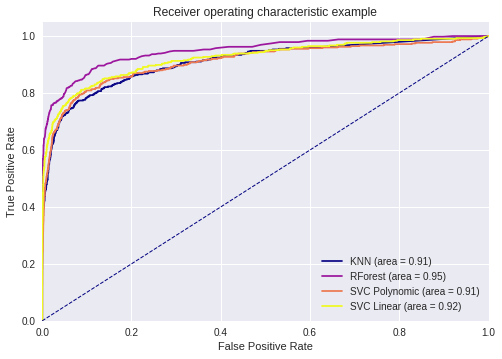

In [11]:
roc({"KNN": knn, "RForest": rf, 
     "SVC Linear": svc_linear,
     "SVC Polynomic": svc_poly})

----

In [12]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">4. b261 Vs. All </h2>
</div>

### 4.1. SVM - Linear

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      5000
          3       0.95      0.60      0.74       297

avg / total       0.98      0.98      0.97      5297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      1.00      0.99      5000
          3       0.97      0.59      0.73       308

avg / total       0.97      0.97      0.97      5308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      5000
          3       0.96      0.48      0.64       424

avg / total       0.96      0.96      0.95      5424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

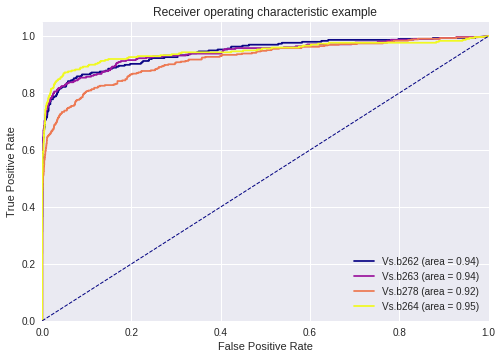

CPU times: user 7.68 s, sys: 55.6 ms, total: 7.73 s
Wall time: 7.82 s


In [13]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b261"))

### 4.2. SVM - Polynomic

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5000
          3       0.94      0.51      0.66       297

avg / total       0.97      0.97      0.97      5297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5000
          3       0.96      0.48      0.64       308

avg / total       0.97      0.97      0.96      5308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      5000
          3       0.99      0.36      0.53       424

avg / total       0.95      0.95      0.94      5424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

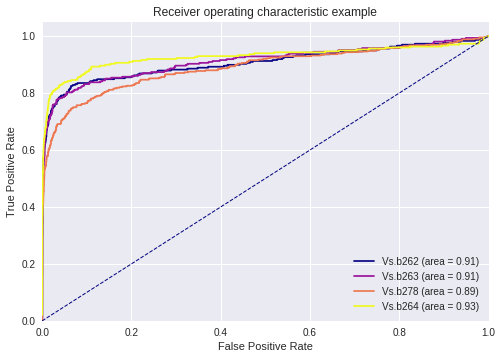

CPU times: user 7.98 s, sys: 55.6 ms, total: 8.04 s
Wall time: 8.42 s


In [14]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b261"))

### 4.3. Random Forest

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5000
          3       1.00      0.44      0.61       297

avg / total       0.97      0.97      0.96      5297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.99      5000
          3       0.98      0.56      0.71       308

avg / total       0.97      0.97      0.97      5308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      5000
          3       1.00      0.47      0.64       424

avg / total       0.96      0.96      0.95      5424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

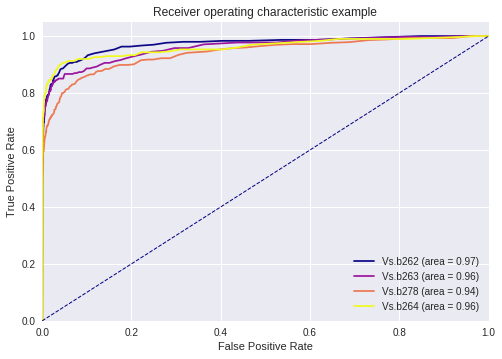

CPU times: user 57.4 s, sys: 95.6 ms, total: 57.5 s
Wall time: 1min


In [15]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b261"))

### 4.4. KNN

b261 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5000
          3       0.91      0.48      0.63       297

avg / total       0.97      0.97      0.96      5297

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.97      1.00      0.98      5000
          3       0.94      0.47      0.62       308

avg / total       0.97      0.97      0.96      5308

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b278 (TEST)
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      5000
          3       0.94      0.38      0.54       424

avg / total       0.95      0.95      0.94      5424

--------------------------------------------------------------------------------
b261 (TRAIN) Vs. b264 (TE

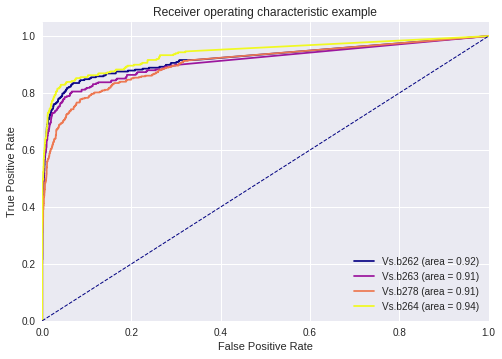

CPU times: user 35.5 s, sys: 104 ms, total: 35.6 s
Wall time: 36.2 s


In [16]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b261"))

In [ ]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">5. b278 Vs. All </h2>
</div>

### 5.1. SVM - Linear

In [ ]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear("b278"))

b278 (TRAIN) Vs. b262 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      5000
          3       0.86      0.68      0.76       297

avg / total       0.97      0.98      0.97      5297

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      5000
          3       0.88      0.65      0.75       308

avg / total       0.97      0.97      0.97      5308

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b261 (TEST)
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      5000
          3       0.80      0.74      0.77       222

avg / total       0.98      0.98      0.98      5222

--------------------------------------------------------------------------------


### 5.2. SVM - Polynomic

In [ ]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly("b278"))

### 5.3. Random Forest

In [ ]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf("b278"))

### 5.4. KNN

In [ ]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn("b278"))

In [ ]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">6. b278+b261 Vs. All </h2>
</div>

### 6.1. SVM - Linear

In [ ]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261"]))

### 6.2. SVM - Polynomic

In [ ]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261"]))

### 6.3. Random Forest

In [ ]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261"]))

### 6.4. KNN

In [ ]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261"]))

In [ ]:
%%html
<div style="background-color: #FFFF6F; color:#525200">
    <h2 style="padding: 10px; text-align:center">7. b278+b261+b264 Vs. All </h2>
</div>

### 7.1. SVM - Linear

In [ ]:
svc_linear = WithAnotherExperiment(
    clf=SVC(kernel='linear', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_linear(["b278", "b261", "b264"]))

### 7.2. SVM - Polynomic

In [ ]:
svc_poly = WithAnotherExperiment(
    clf=SVC(kernel='poly', probability=True), clsnum=sclasses, 
    data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(svc_poly(["b278", "b261", "b264"]))

### 7.3. Random Forest

In [ ]:
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy"), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(rf(["b278", "b261", "b264"]))

### 7.4. KNN

In [ ]:
knn = WithAnotherExperiment(
    clf=KNeighborsClassifier(n_neighbors=50, weights='distance'), 
    clsnum=sclasses, data=data, pcls="RRLyr", X_columns=X_columns, y_column="scls")
%time roc(knn(["b278", "b261", "b264"]))

In [ ]:
print("Total Run Time: " + str(time.time() - start))
del start